In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.colorbar import colorbar

import random
import torch

In [4]:
# folder name
EXPERIMENT = 'experiment_1'

In [5]:
e1 = torch.load(EXPERIMENT + '/train_1.params')
e2 = torch.load(EXPERIMENT + '/train_2.params')

In [6]:
# vmin and vmax are used in conjunction with norm to normalize luminance data. Note if you pass a norm instance, your settings for vmin and vmax will be ignored.
vmin = -1
vmax = 1


params = list(e1)
num_axes = len(params) # + 1  # one extra for the colorbar
f, axarr = plt.subplots(ncols=num_axes, sharey=True)
for i, param in enumerate(params):
    index = i # + 1  # colorbar is at position 0
    if len(param.size()) == 1:
        param = param.unsqueeze(1)
    image = axarr[index].imshow(param.data.numpy(), cmap='bone', aspect='equal', vmin=vmin, vmax=vmax, extent=(0, 5, 0, 1))
    axarr[index].set_title('axarr[{}]: {}'.format(index, param.size()))

# grid = ImageGrid(F, 111,  # similar to subplot(111)
#              nrows_ncols=(1, 3),
#              axes_pad=0.1,  # spacing between things
#              add_all=True,
#              label_mode="L",
#              )

# grid2 = ImageGrid(F, 212,
#       nrows_ncols = (1, 3),
#       direction="row",
#       axes_pad = 0.05,
#       add_all=True,
#       label_mode = "1",
#       share_all = True,
#       cbar_location="right",
#       cbar_mode="single",
#       cbar_size="10%",
#       cbar_pad=0.05,
#       )

# f.subplots_adjust(hspace=30)

# cb1 = f.colorbar(image, ax=axarr[0])
# cb1 = f.colorbar(image, ax=axarr[0], height="100%")  # __init__ got unexpected kwarg 'height'

plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.show()

# draw_net(net)

TypeError: Invalid dimensions for image data

ATTEMPT 2

In [10]:
# vmin and vmax are used in conjunction with norm to normalize luminance data. Note if you pass a norm instance, your settings for vmin and vmax will be ignored.
vmin = -1
vmax = 1


params = list(e1)
num_cols = len(params) # + 1  # one extra for the colorbar
f, axarr = plt.subplots(ncols=num_cols, sharey=True)
# for i, param in enumerate(params):
#     index = i # + 1  # colorbar is at position 0
#     if len(param.size()) == 1:
#         param = param.unsqueeze(1)
#     image = axarr[index].imshow(param.data.numpy(), cmap='bone', aspect='equal', vmin=vmin, vmax=vmax, extent=(0, 5, 0, 1))
#     axarr[index].set_title('axarr[{}]: {}'.format(index, param.size()))

grid = ImageGrid(f, 111,  # similar to subplot(111)
    nrows_ncols=(1, num_cols),
    axes_pad=0.1,  # spacing between things
    add_all=True,
    label_mode="L",
)

for ax, param in zip(grid, params):
    im = ax.imshow(param,
                   origin="lower",
                   interpolation="nearest")

plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.show()

# draw_net(net)

NameError: name 'ImageGrid' is not defined

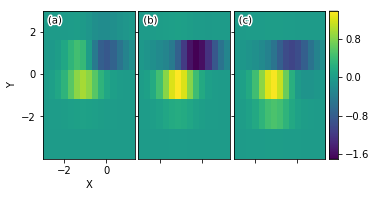

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
  
def get_demo_image():
    from matplotlib.cbook import get_sample_data
    f = get_sample_data("axes_grid/bivariate_normal.npy", asfileobj=False)
    z = np.load(f)
    # z is a numpy array of 15x15
    return z, (-3,4,-4,3)
  
  
def add_inner_title(ax, title, loc, size=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    from matplotlib.patheffects import withStroke
    if size is None:
        size = dict(size=plt.rcParams['legend.fontsize'])
    at = AnchoredText(title, loc=loc, prop=size,
                      pad=0., borderpad=0.5,
                      frameon=False, **kwargs)
    ax.add_artist(at)
    at.txt._text.set_path_effects([withStroke(foreground="w", linewidth=3)])
    return at
  
if 1:
    F = plt.figure(1, (6, 6))
    F.clf()t
  
    # prepare images
    Z, extent = get_demo_image()
    ZS = [Z[i::3,:] for i in range(3)]
    extent = extent[0], extent[1]/3., extent[2], extent[3]
  
    grid2 = ImageGrid(F, 212,
                      nrows_ncols = (1, 3),
                      direction="row",
                      axes_pad = 0.05,
                      add_all=True,
                      label_mode = "1",
                      share_all = True,
                      cbar_location="right",
                      cbar_mode="single",
                      cbar_size="10%",
                      cbar_pad=0.05,
                      )
  
    grid2[0].set_xlabel("X")
    grid2[0].set_ylabel("Y")
  
    vmax, vmin = np.max(ZS), np.min(ZS)
    import matplotlib.colors
    norm = matplotlib.colors.Normalize(vmax=vmax, vmin=vmin)
  
    for ax, z in zip(grid2, ZS):
        im = ax.imshow(z, norm=norm,
                       origin="lower", extent=extent,
                       interpolation="nearest")
  
    # With cbar_mode="single", cax attribute of all axes are identical.
    ax.cax.colorbar(im)
    ax.cax.toggle_label(True)
  
    for ax, im_title in zip(grid2, ["(a)", "(b)", "(c)"]):
        t = add_inner_title(ax, im_title, loc=2)
        t.patch.set_ec("none")
        t.patch.set_alpha(0.5)
  
    grid2[0].set_xticks([-2, 0])
    grid2[0].set_yticks([-2, 0, 2])
  
    plt.draw()
    plt.show()

225
150
75


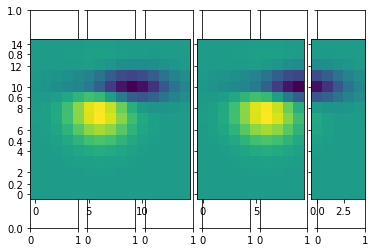

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


def get_demo_image():
    import numpy as np
    from matplotlib.cbook import get_sample_data
    f = get_sample_data("axes_grid/bivariate_normal.npy", asfileobj=False)
    z = np.load(f)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)

F = plt.figure(1, (5.5, 3.5))
grid = ImageGrid(F, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 3),
                 axes_pad=0.1,  # spacing between things
                 add_all=True,
                 label_mode="L",
                 )

Z, extent = get_demo_image()  # demo image

im1 = Z
im2 = Z[:, :10]
im3 = Z[:, 10:]
vmin, vmax = Z.min(), Z.max()
for i, im in enumerate([im1, im2, im3]):
    ax = grid[i]  
    print(im.size)q
    ax.imshow(im, origin="lower", vmin=vmin,
              vmax=vmax, interpolation="nearest")

plt.draw()
plt.show()

See if you can get a net to memorize some stuff, and make a GIF of the weights.

Then, find an ambiguous example and visualize the product of the weights and the example.

Train 2 nets, 1 where labels are regular, another where labels for 3 and 5 are swapped, and show it an ambiguous example?

For an ambiguous example in an overfitted net: show the weight matrix @ input example + bias.

For an ambiguous example in a regularized net: show the weight matrix @ input example + bias.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

BATCH_SIZE = 64
EPOCHS = 10
LOG_INTERVAL = 10
LR = .01
MOMENTUM = 0.5
NO_CUDA = True
SEED = 1
TEST_BATCH_SIZE = 1000

CUDA = not NO_CUDA and torch.cuda.is_available()

torch.manual_seed(SEED)
if CUDA:
    torch.cuda.manual_seed(SEED)


kwargs = {'num_workers': 1, 'pin_memory': True} if CUDA else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=BATCH_SIZE, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=TEST_BATCH_SIZE, shuffle=True, **kwargs)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

model = Net()
if CUDA:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=LR, momentum=MOMENTUM)

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if CUDA:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % LOG_INTERVAL == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        if CUDA:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


for epoch in range(1, EPOCHS + 1):
    train(epoch)
    test()

Processing...
Done!
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.316824
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.311471
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.298839
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.317593
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.282021
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.272163
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.291142
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.246593
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.220413
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.205367
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.165900
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.080920
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.102153
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.035287
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.856040
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.735446
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.667757
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.584762
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.507836
Train Epoch: 1 [12160/60000 (20%)]	Loss: 1.421516
Train Epo

Train Epoch: 2 [40960/60000 (68%)]	Loss: 0.330823
Train Epoch: 2 [41600/60000 (69%)]	Loss: 0.486814
Train Epoch: 2 [42240/60000 (70%)]	Loss: 0.461023
Train Epoch: 2 [42880/60000 (71%)]	Loss: 0.346284
Train Epoch: 2 [43520/60000 (72%)]	Loss: 0.387090
Train Epoch: 2 [44160/60000 (74%)]	Loss: 0.414740
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.391163
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.289653
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.243272
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.368641
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.209355
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.324647
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.434522
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.147051
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.348294
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.304081
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.190448
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.502217
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.309918
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.255384


Train Epoch: 4 [24960/60000 (42%)]	Loss: 0.271748
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.200790
Train Epoch: 4 [26240/60000 (44%)]	Loss: 0.318684
Train Epoch: 4 [26880/60000 (45%)]	Loss: 0.215289
Train Epoch: 4 [27520/60000 (46%)]	Loss: 0.119326
Train Epoch: 4 [28160/60000 (47%)]	Loss: 0.112552
Train Epoch: 4 [28800/60000 (48%)]	Loss: 0.257822
Train Epoch: 4 [29440/60000 (49%)]	Loss: 0.321074
Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.119655
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.136529
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.223867
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.172835
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.306441
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.206827
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.351573
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.240033
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.139522
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.214827
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.348746
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.354393


Train Epoch: 6 [8960/60000 (15%)]	Loss: 0.131367
Train Epoch: 6 [9600/60000 (16%)]	Loss: 0.394623
Train Epoch: 6 [10240/60000 (17%)]	Loss: 0.240090
Train Epoch: 6 [10880/60000 (18%)]	Loss: 0.254966
Train Epoch: 6 [11520/60000 (19%)]	Loss: 0.265752
Train Epoch: 6 [12160/60000 (20%)]	Loss: 0.174758
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.140434
Train Epoch: 6 [13440/60000 (22%)]	Loss: 0.132501
Train Epoch: 6 [14080/60000 (23%)]	Loss: 0.250095
Train Epoch: 6 [14720/60000 (25%)]	Loss: 0.166731
Train Epoch: 6 [15360/60000 (26%)]	Loss: 0.155925
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.197254
Train Epoch: 6 [16640/60000 (28%)]	Loss: 0.143797
Train Epoch: 6 [17280/60000 (29%)]	Loss: 0.178002
Train Epoch: 6 [17920/60000 (30%)]	Loss: 0.249732
Train Epoch: 6 [18560/60000 (31%)]	Loss: 0.324147
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.330739
Train Epoch: 6 [19840/60000 (33%)]	Loss: 0.178461
Train Epoch: 6 [20480/60000 (34%)]	Loss: 0.211217
Train Epoch: 6 [21120/60000 (35%)]	Loss: 0.158600
Tr

Train Epoch: 7 [53760/60000 (90%)]	Loss: 0.159490
Train Epoch: 7 [54400/60000 (91%)]	Loss: 0.489104
Train Epoch: 7 [55040/60000 (92%)]	Loss: 0.322159
Train Epoch: 7 [55680/60000 (93%)]	Loss: 0.382911
Train Epoch: 7 [56320/60000 (94%)]	Loss: 0.206411
Train Epoch: 7 [56960/60000 (95%)]	Loss: 0.227547
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.095158
Train Epoch: 7 [58240/60000 (97%)]	Loss: 0.256408
Train Epoch: 7 [58880/60000 (98%)]	Loss: 0.215765
Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.218335

Test set: Average loss: 0.0704, Accuracy: 9759/10000 (98%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.154275
Train Epoch: 8 [640/60000 (1%)]	Loss: 0.119337
Train Epoch: 8 [1280/60000 (2%)]	Loss: 0.194410
Train Epoch: 8 [1920/60000 (3%)]	Loss: 0.273578
Train Epoch: 8 [2560/60000 (4%)]	Loss: 0.313849
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.191937
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.260273
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.204900
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.133042
Train Epoch

Train Epoch: 9 [37760/60000 (63%)]	Loss: 0.172132
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.141159
Train Epoch: 9 [39040/60000 (65%)]	Loss: 0.150225
Train Epoch: 9 [39680/60000 (66%)]	Loss: 0.123301
Train Epoch: 9 [40320/60000 (67%)]	Loss: 0.150698
Train Epoch: 9 [40960/60000 (68%)]	Loss: 0.233939
Train Epoch: 9 [41600/60000 (69%)]	Loss: 0.165905
Train Epoch: 9 [42240/60000 (70%)]	Loss: 0.188945
Train Epoch: 9 [42880/60000 (71%)]	Loss: 0.265951
Train Epoch: 9 [43520/60000 (72%)]	Loss: 0.153173
Train Epoch: 9 [44160/60000 (74%)]	Loss: 0.134099
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.101595
Train Epoch: 9 [45440/60000 (76%)]	Loss: 0.373220
Train Epoch: 9 [46080/60000 (77%)]	Loss: 0.283456
Train Epoch: 9 [46720/60000 (78%)]	Loss: 0.165883
Train Epoch: 9 [47360/60000 (79%)]	Loss: 0.255367
Train Epoch: 9 [48000/60000 (80%)]	Loss: 0.313904
Train Epoch: 9 [48640/60000 (81%)]	Loss: 0.134861
Train Epoch: 9 [49280/60000 (82%)]	Loss: 0.199200
Train Epoch: 9 [49920/60000 (83%)]	Loss: 0.230385


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

BATCH_SIZE = 64
EPOCHS = 10
LOG_INTERVAL = 10
LR = .01
MOMENTUM = 0.5
NO_CUDA = True
SEED = 1
TEST_BATCH_SIZE = 1000

CUDA = not NO_CUDA and torch.cuda.is_available()

torch.manual_seed(SEED)
if CUDA:
    torch.cuda.manual_seed(SEED)


kwargs = {'num_workers': 1, 'pin_memory': True} if CUDA else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=BATCH_SIZE, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=TEST_BATCH_SIZE, shuffle=True, **kwargs)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

model = Net()
if CUDA:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=LR, momentum=MOMENTUM)

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if CUDA:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % LOG_INTERVAL == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        if CUDA:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


for epoch in range(1, EPOCHS + 1):
    train(epoch)
    test()